# **Decision Tree Regression**

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs and utility.
Decision-tree algorithms fall under the category of supervised learning algorithms.

Decision tree analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. Decision trees are the most powerful algorithms that fall under the category of supervised algorithms.

They can be used for both classification and regression tasks. The two main entities of a tree are decision nodes, where the data is split and leaves, where we get outcome.

**Simple example of a decision tree:**

![alt text](https://lh3.googleusercontent.com/Knu4V04Wo27hsE47luJ1YXhv93j6SaTAGa3NaWyHnWMgP7xIKb02OIpjmoYwtnfYuf0VLeq7hR0-zB6GE7kOQN32tLeGhCfjlMbB14kunbLT6msVpIvMwSTE4XmUGOjfgSYBwSKP)



## **Problem Statement example for Decision Tree Regression:**
Here we are taking a dataset that has two variables: salary (Dependent variable) and experience (Independent variable) for a particular domain.

Let's load our dataset first..

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('./data_folder/salary_data.xlsx')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Let us understand the working of Decision Tree Regression CONCEPTUALLY first:

We have plotted our dataset into a Scatter plot graph as follows:


In [3]:
import seaborn as sns

<Axes: xlabel='YearsExperience', ylabel='Salary'>

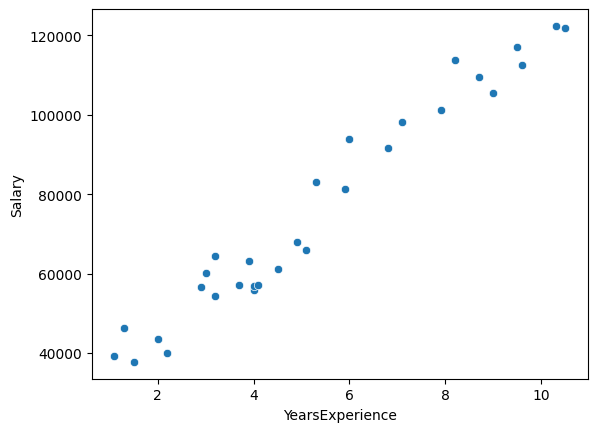

In [4]:
sns.scatterplot(data = df, x = 'YearsExperience', y = 'Salary')

Here,
- Input variable (X) = Experience
- Output variable (Y) = Salary

**STEP 1: Select any column (Axis) from the input variable.**

Here, we have only one column in the input variable so we have to choose Experience as the axis.

Here, AXIS = EXPERIENCE

**Step 2 : From the column that has been selected as the axis in the step 1 , select any value between the maximum and the minimum value.**

Here, the minimum value is 1.1 and the maximum value is 10.5

We can choose any value between the min and max. Here we choode 5.9.

**Step 3: Divide the data along the point choosen.**

![alt text](https://lh6.googleusercontent.com/CQwj3IzHzkTWTfpDI5gefDiaeGCzMfQkUORhOSt4KDi9CxfE70flSMUqiK7tm-jak-BV45gCcifTViBp1Fz7_zXhW93d9JWhYvxvXSFdwP4WPQV94w0JjC7iMd64g9drz9a1SJ33)

**Step 4: Choose the Splitting Criteria.**

If the number of data points is more than the splitting criteria we will divide the data further, if it is not we will not divide the part further.
Here we choose the splitting criteria as 7.
Only if there are more than 7 data points in a group we will split it further.

![alt text](https://docs.google.com/drawings/u/0/d/syczmse4lQTeFuA71O9BvtQ/image?w=305&h=95&rev=71&ac=1&parent=1WfZW_rSLHeG_mOSQECzu_fdt8AKugxNQODyDJVwsRGU)

**Step 5: repeat step 2 to 4 Till the splitting crieta is satisfied.**

![alt text](https://docs.google.com/drawings/u/0/d/sNNSerAxRH3TIdM-wAUNcNQ/image?w=611&h=233&rev=346&ac=1&parent=1WfZW_rSLHeG_mOSQECzu_fdt8AKugxNQODyDJVwsRGU)

**Step 6: Now we consider the salary of each group as the average of the salaries of that group.**

There, average salary of the groups will be :

- Part 1: 41,701
- Part 2: 52,782
- Part 3: 59,114
- Part 4: 71,905
- Part 5: 1,01,416
- Part 6: 1,15,889

So we if we get an input variable x experience as 10 the predicted salary will be of Part 6 → 1,15,889


## **Program 1 :**
Dataset:

X → YearsExperience

Y → Salary


In [5]:
X = df.iloc[ : ,0:1].values
Y = df.iloc[ : ,1:2].values

In [6]:
X.ravel().shape

(30,)

In [7]:
X.ravel()     # just to see short output nothing else

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [8]:
Y.ravel()

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [9]:
#imputer on X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer.fit(X[:, 0:1])
X[:, 0:1] = imputer.transform (X[:, 0:1])

In [11]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X,Y)

DecisionTreeRegressor()

In [12]:
#prediction
# newdataset = pd.DataFrame({'YearsExperience': [3.4, 2.7, 3.3, 4.3]}, index = [0, 1, 2, 3])
# newx = newdataset.iloc[ : , 0:1].values
# newx[ : ,0:1] = imputer.transform(newx[ : ,0:1])
# ypred = dt.predict(newx)


ypred = dt.predict([[3.4], [2.7], [3.3], [4.3]])

In [13]:
ypred

array([59445., 56642., 59445., 61111.])

In [14]:
#to print the output
i = 0
for data in [[3.4], [2.7], [3.3], [4.3]]:
   print("Predicted salary for", data, "is",ypred[i])
   i = i + 1

Predicted salary for [3.4] is 59445.0
Predicted salary for [2.7] is 56642.0
Predicted salary for [3.3] is 59445.0
Predicted salary for [4.3] is 61111.0


In [15]:
dt.feature_importances_

array([1.])

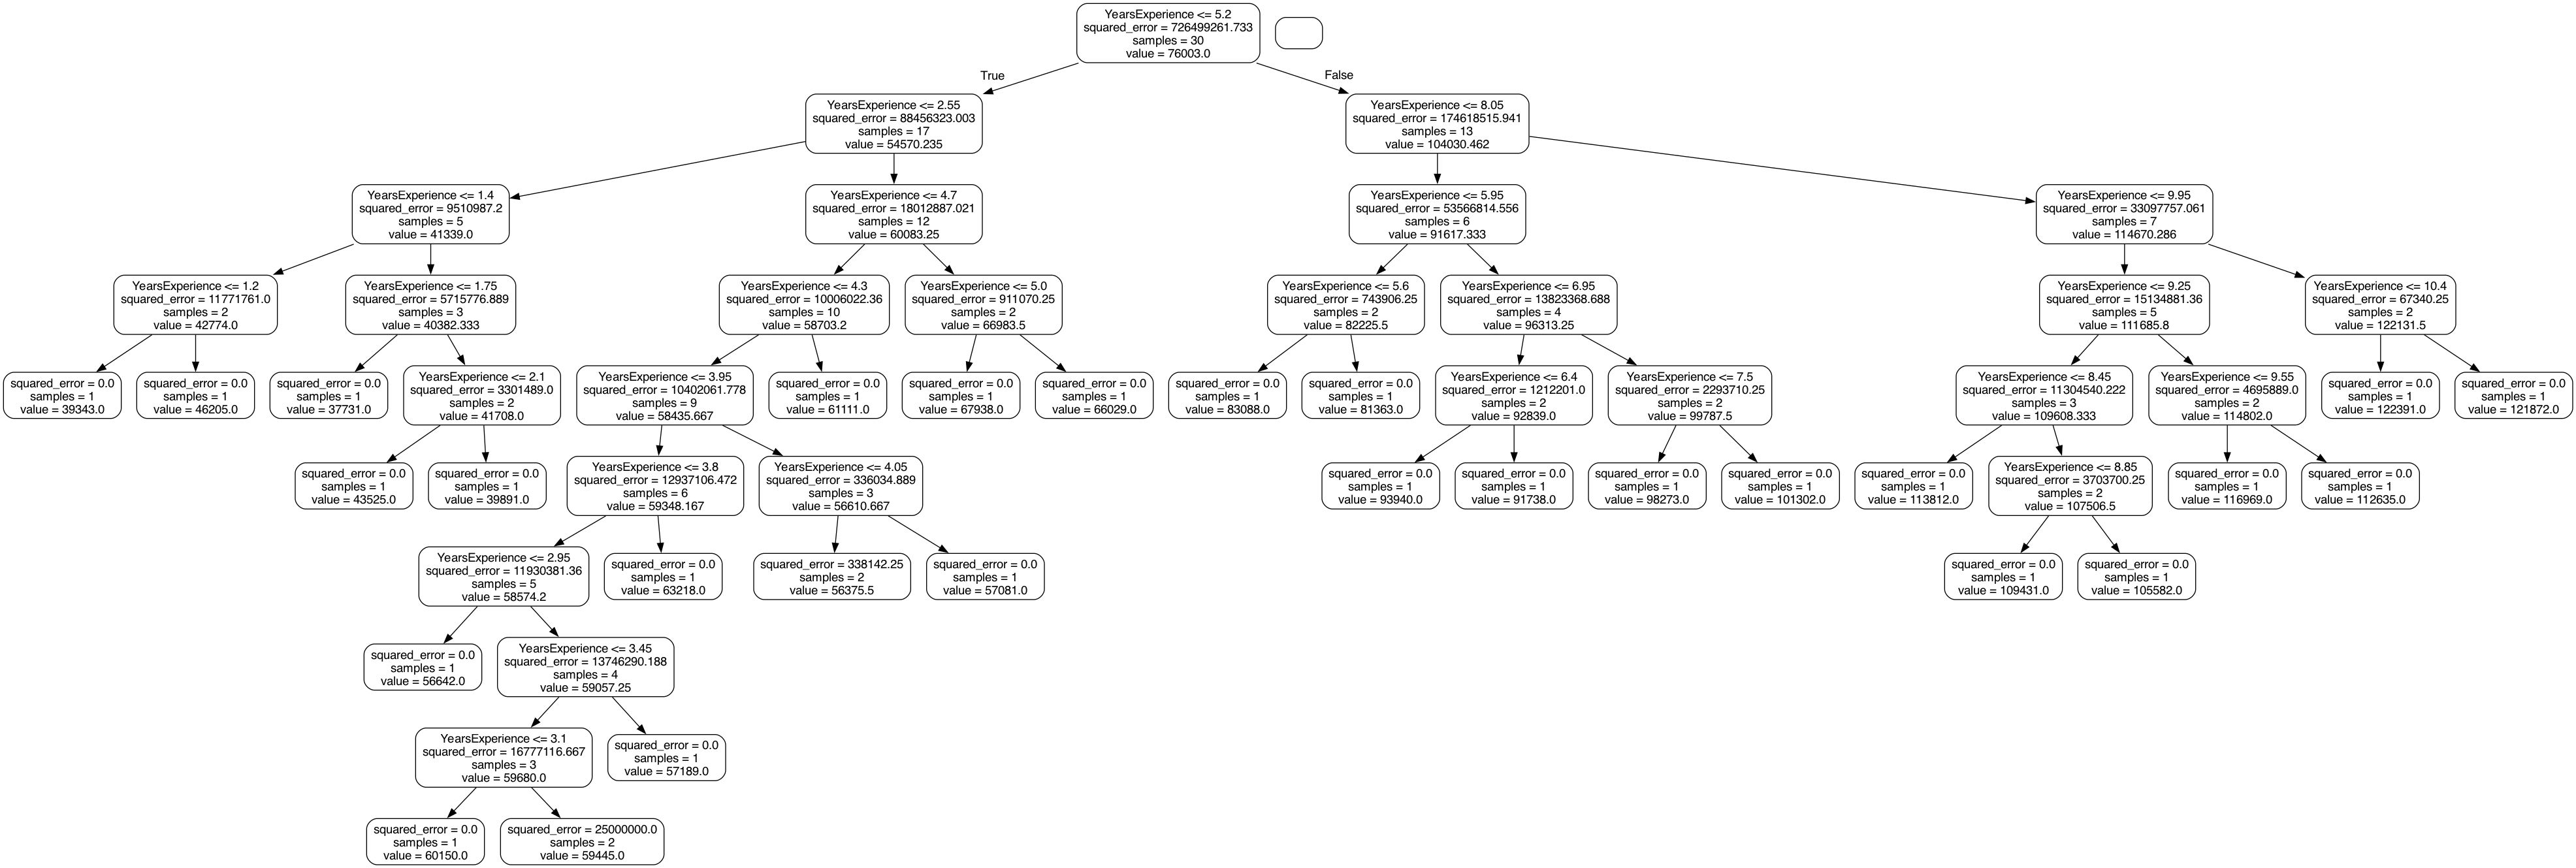

In [22]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    decision_tree = dt,
    out_file = dot_data,
    rounded = True,
    feature_names = ['YearsExperience'],
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## **Decision Tree Regression with more than one input variable:**
Our Dataset is as follows:



In [16]:
import pandas as pd

In [17]:
data = pd.read_excel('./data_folder/startups_50.xlsx')

In [18]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: xlabel='Marketing Spend', ylabel='Profit'>

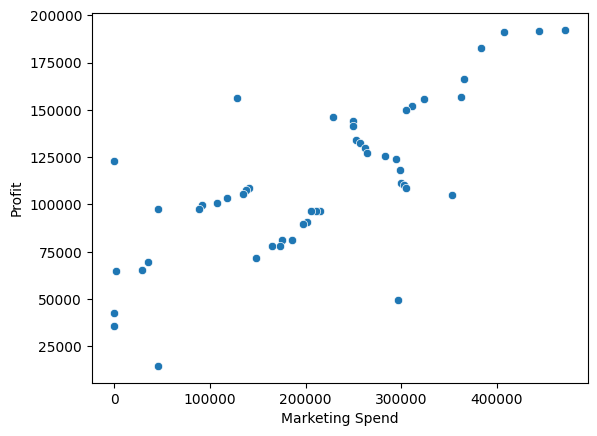

In [48]:
import seaborn as sns

sns.scatterplot(data, x='Marketing Spend', y='Profit')

In [24]:
# splitting independent and dependent data

# independent
inputs = data.iloc[:, :-1].values
# dependent
target = data.iloc[:, 4].values

In [25]:
inputs[:10]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California']], dtype=object)

In [26]:
target[:10]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96])

In [27]:
# label encoding on categorical data

from sklearn.preprocessing import LabelEncoder
le_state = LabelEncoder()

In [28]:
inputs[:, 3] = le_state.fit_transform(inputs[: , 3])
inputs[:10]

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0]], dtype=object)

In [29]:
le_state.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [3])],                    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

inputs = ct.fit_transform(inputs)

In [31]:
inputs[:10]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

In [32]:
# avoiding dummy value trap

inputs = inputs[:, 1:]
inputs[:10]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

In [33]:
# creating model

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [34]:
dtr.fit(inputs, target)

DecisionTreeRegressor()

In [35]:
# let's create input data

df1 = pd.DataFrame({'R&D Spend': 175348, 'Administration': 116897, 'Maketing Spend':671784.1, 'State': 'New York'}, index = [0])
df1

,R&D Spend,Administration,Maketing Spend,State
0,175348,116897,671784.1,New York


In [36]:
newx = df1.iloc[:, 0:].values
newx[:, 3] = le_state.transform(newx[:, 3])
newx = ct.transform(newx)

In [37]:
newx = newx[:, 1:]
print(newx)

[[0.0 1.0 175348 116897 671784.1]]


In [38]:
dtr.predict(newx)

array([191050.39])

In [39]:
dtr.feature_importances_

array([5.07208271e-03, 2.34491073e-05, 9.76336819e-01, 2.36143468e-03,
       1.62062143e-02])

**OHHHHHHKKKKKKK**

Here we are done with coding now it's time to understand by which algorithm decision tree regressor selects the right feature and right threshhold through which it partitions our data ......


Let's go

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperpara‐
meter), or if it cannot find a split that will reduce impurity. A few other hyperparameters (described in a moment) control additional stopping conditions
(min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and
max_leaf_nodes).

## **Decision Tree Algorithm Working**

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.


### **Types of Decision Trees**

Types of decision trees are based on the type of target variable we have. It can be of two types:

- **Categorical Variable Decision Tree:** Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.

- **Continuous Variable Decision Tree:** Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

**Example:-** Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (yes/ no). Here we know that the income of customers is a significant variable but the insurance company does not have income details for all customers. Now, as we know this is an important variable, then we can build a decision tree to predict customer income based on occupation, product, and various other variables. In this case, we are predicting values for the continuous variables.

### **Assumptions while creating Decision Tree**

Below are some of the assumptions we make while using Decision tree:

- In the beginning, the whole training set is considered as the root.
Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
- Records are distributed recursively on the basis of attribute values.
Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

The primary challenge in the decision tree implementation is to identify which attributes do we need to consider as the root node and each level. Handling this is to know as the attributes selection. We have different attributes selection measures to identify the attribute which can be considered as the root note at each level.

## **How do Decision Trees work?**

The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria are different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable. The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

The algorithm selection is also based on the type of target variables. Let us look at some algorithms used in Decision Trees:

- ID3 → (extension of D3)
- C4.5 → (successor of ID3)
- CART → (Classification And Regression Tree)
- CHAID → (Chi-square automatic interaction detection Performs multi-level - splits when computing classification trees)
- MARS → (multivariate adaptive regression splines)

The ID3 algorithm builds decision trees using a top-down greedy search approach through the space of possible branches with no backtracking. A greedy algorithm, as the name suggests, always makes the choice that seems to be the best at that moment.

**Steps in ID3 algorithm:**

It begins with the original set S as the root node.

On each iteration of the algorithm, it iterates through the very unused attribute of the set S and calculates Entropy(H) and Information gain(IG) of this attribute.

It then selects the attribute which has the smallest Entropy or Largest Information gain.

The set S is then split by the selected attribute to produce a subset of the data.

The algorithm continues to recur on each subset, considering only attributes never selected before.


**Attribute Selection Measures**

If the dataset consists of N attributes then deciding which attribute to place at the root or at different levels of the tree as internal nodes is a complicated step. By just randomly selecting any node to be the root can’t solve the issue. If we follow a random approach, it may give us bad results with low accuracy.

For solving this attribute selection problem, researchers worked and devised some solutions. They suggested using some criteria like :


```
Entropy,
Information gain,
Gini index,
Gain Ratio,
Reduction in Variance
Chi-Square

https://www.analyticsvidhya.com/blog/2020/11/entropy-a-key-concept-for-all-data-science-beginners/
```

These criteria will calculate values for every attribute. The values are sorted, and attributes are placed in the tree by following the order i.e, the attribute with a high value(in case of information gain) is placed at the root.
While using Information Gain as a criterion, we assume attributes to be categorical, and for the Gini index, attributes are assumed to be continuous.

## **Reduction in Variance**

Reduction in variance is an algorithm used for continuous target variables (regression problems). This algorithm uses the standard formula of variance to choose the best split. The split with lower variance is selected as the criteria to split the population:


Above X-bar is the mean of the values, X is actual and n is the number of values.

**Steps to calculate Variance:**

- Calculate variance for each node.
- Calculate variance for each split as the weighted average of each node variance.

### **Decision Tree Regressor Implementation**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('/content/startups_50.xlsx')
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
inputs = data.iloc[:, :-2].values
target = data.iloc[:, -1].values

In [ ]:
class Node():
  def __init__(self, feature_index = None, threshold = None, left = None, right = None, var_red = None, value = None):
    # for decison nodes
    self.feature_index = feature_index
    self.threshold = threshold
    self.left = left
    self.right = right
    self.var_red = var_red
    # for leaf node
    self.value = value

In [ ]:
class DecisionTreeRegressorPython():

  def __init__(self, min_samples_split = 2, max_depth = 2):
    self.root = None
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth

  def build_tree(self, dataset, curr_depth = 0):
    # recurisve function to build the tree
    X, Y = dataset[:, :-1], dataset[:, -1]
    num_samples, num_features = np.shape(X)
    best_split = {}
    # split until stopping conditions are met
    if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
      # finding the best split
      best_split = self.get_best_split(dataset, num_samples, num_features)

      if best_split['var_red'] > 0:
        left_subtree = self.build_tree(best_split['dataset_left'], curr_depth + 1)
        right_subtree = self.build_tree(best_split['database_right'], curr_depth + 1)
        return Node(best_split['feature_index'], best_split['thrshold'], left_subtree, right_subtree, best_split['var_red'])

    leaf_value = self.calculate_leaf_value(Y)
    return Node(value = leaf_value)

  def get_best_split(self, dataset, num_samples, num_features):
    # this function will find the best split
    best_split = {}
    max_var_red = -float('inf')
    for feature_index in range(num_features):
      feature_values = dataset[:, feature_index]
      possible_thresholds = np.unique(feature_values)
      for threshold in possible_thresholds:
        dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
        if len(dataset_left) > 0 and len(dataset_right) > 0:
          y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset[:, -1]
          curr_var_red = self.variance_reduction(y, left_y, right_y)
          if curr_var_red > max_var_red:
            best_split['feature_index'] = feature_index
            best_split['threshold'] = threshold
            best_split['dataset_left'] = dataset_left
            best_split['dataset_right'] = dataset_right
            best_split['var_red'] = curr_var_red
    return best_split

  def split(self, dataset, feature_index, threshold):
    dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
    dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
    return dataset_left, dataset_right

  def variance_reduction(self, parent, l_child, r_child):
    # function to compute variance reduction
    weight_l = len(l_child) / len(parent)
    weight_r = len(r_child) / len(parent)
    reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
    return reduction

  def calculate_leaf_value(self, Y):
    return np.mean(Y)

  def fit(self, X, Y):
    dataset = np.concatenate((X, Y), axis = 1)
    self.root = self.build_tree(dataset)

  def print_tree(self, tree = None, indent = " "):
    ''' function to print the tree '''
    if not tree:
      tree = self.root
    if tree.value is not None:
      print(tree.value)
    else:
      print("X_" + str(tree.feature_index), " <= ", tree.threshold, " ? ", tree.var_red)
      print("%sleft:" % (indent), end = "")
      self.print_tree(tree.left, indent + indent)
      print("%sright:" % (indent), end = "")
      self.print_tree(tree.right, indent + indent)

  def make_prediction(self, x, tree):
    if tree.value != None:
      return tree.value
    feature_val = x[tree.feature_index]
    if feature_val <= tree.thershold:
      return self.make_prediction(x, tree.left)
    else:
      return self.make_prediction(x, tree.right)

  def predict(self, X):
    predictions = [self.make_prediction(x, self.root) for x in X]
    return predictions

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size = .2, random_state = 41)

In [ ]:
regressor = DecisionTreeRegressorPython(min_samples_split = 2, max_depth = 2)
regressor.fit(X_train, Y_train.reshape(-1, 1))
regressor.print_tree()

110198.51775


In [ ]:
Y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))

41810.54939275204

In [ ]:
newx[:, 2:]

array([[175348, 116897, 671784.1]], dtype=object)

In [ ]:
Y_pred = regressor.predict(newx)
Y_pred

[110198.51775]